In [1]:
from load_data import load_data

In [2]:
from create_model import create_model

In [3]:
from learn_that import learn_that

In [4]:
from learn_that import evaluate

In [5]:
from learn_that import device
from plot_losses import plot_losses
import zero

In [6]:
task_type = "binclass"

In [7]:
X, y, old_x, X_all, y_std = load_data("data/", "adult_processed.csv", task_type=task_type)

In [8]:
model, optimizer, loss_fn = create_model(X_all, task_type=task_type)

In [9]:
epochs = 10
batch_size = 100
relational_batch = True
# train_loader = zero.data.IndexLoader(len(X['train']), batch_size, device=device)

In [10]:
losses = learn_that(
                model, 
                optimizer, 
                loss_fn, 
                X, 
                y, 
                y_std,
                epochs, 
                batch_size, 
                relational_batch, 
                old_x, 
                print_mode=False, 
                _task_type=task_type)

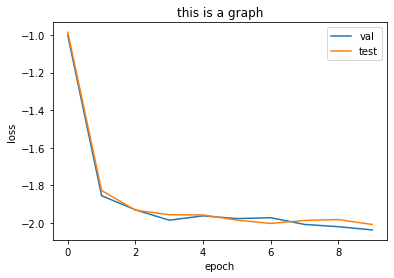

In [11]:
plot_losses(losses)